# Library Install

In [1]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install PySastrawi
!pip install tweepy
!pip install wordcloud

In [1]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
from datetime import timedelta
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [3]:
filename = "DataTweet.csv"
df = pd.read_csv(filename,delimiter=',',encoding = 'latin-1')

df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,1757553070039564453,Tue Feb 13 23:51:20 +0000 2024,0,Jadi ini gambaran kalo prabowo gibran menang. ...,1757553070039564453,NaN,NaN,in,NaN,0,0,0,https://x.com/anothermaria4/status/17575530700...,1592151788660346883,anothermaria4,ganjar
3888,1757260094193160434,Tue Feb 13 23:51:15 +0000 2024,0,@liputan6dotcom Eh pacarku kalo Anies nggak me...,1757553049378463966,https://pbs.twimg.com/media/GGQVLtPbkAAxuNN.jpg,liputan6dotcom,in,Indonesia,0,0,0,https://x.com/andiraness/status/17575530493784...,1706246569568419840,andiraness,ganjar
3889,1757553029069647909,Tue Feb 13 23:51:10 +0000 2024,1,PRABOWO sudah BERBAKTI n BERJUANG buat BANGSA ...,1757553029069647909,https://pbs.twimg.com/media/GGQR9R3aoAABnlZ.jpg,NaN,in,NaN,0,0,0,https://x.com/ArdoyantoE/status/17575530290696...,1434495317496381443,ArdoyantoE,ganjar
3890,1757260094193160434,Tue Feb 13 23:51:02 +0000 2024,0,@liputan6dotcom Nih bro kalau Anies kandas di ...,1757552995800403996,https://pbs.twimg.com/media/GGQVIkUbQAAEj8u.jpg,liputan6dotcom,in,Indonesia,0,0,0,https://x.com/amaqirana/status/175755299580040...,1706243637095677952,amaqirana,ganjar


# Cleaning

In [4]:
df = df.drop_duplicates(subset=['full_text'])

df.shape


(3718, 16)

In [5]:
# remove mention username and re-tweet

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

In [6]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['full_text'], " *RT* | *@[\w]*")
df.head()

C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_3988\925070387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = np.vectorize(remove_pattern)(df['full_text'], " *RT* | *@[\w]*")


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...


In [7]:
# remove simbol

def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    return text

df['remove_http'] = df['clean_tweet'].apply(lambda x: remove(x))
df.head()

C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_3988\1983676839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove_http'] = df['clean_tweet'].apply(lambda x: remove(x))


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet,remove_http
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...,Politik itu mahal Demi yg melanggar HAM dan pe...
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...,pak anies kucing nya 4 yang Kaki 3 sama yang p...
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...,Serem bener prabowo PeDenya kayak survei abal ...


In [8]:
# remove

def remov(tweet):
    #remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[/s]+', '', tweet)
    
    #remove hashtags
    #only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    
    return tweet

df['remove_hastag'] = df['remove_http'].apply(lambda x: remov(x))

df.head()

C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_3988\2884624326.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove_hastag'] = df['remove_http'].apply(lambda x: remov(x))


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet,remove_http,remove_hastag
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...,Politik itu mahal Demi yg melanggar HAM dan pe...,Politik itu mahal Demi yg melanggar HAM dan pe...
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...,pak anies kucing nya 4 yang Kaki 3 sama yang p...,pak anies kucing nya yang Kaki sama yang pin...
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...,Serem bener prabowo PeDenya kayak survei abal ...,Serem bener prabowo PeDenya kayak survei abal ...


# Case Folding

In [9]:
#import stopword
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover,ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahin', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iw', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'klrga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'mas', 'sdh','kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh',
    'dlu', 'tuhh'
]

data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
stwr = StopWordRemover(dictionary)

print(data)

# import satsrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':0)', ':]', '3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', 'D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '-D', 'D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3' ])

# Sad Emoticons
emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-(',':[', ':-||', '=L', ':<',
                     ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
                     ':-c', ':{', '>:\\', ';('
])
    

# all emoticons (happy+sad)
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    
    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in data and # remove stopword
           word not in emoticons and # remove emoticons
           word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

df['Tweet'] = df['remove_hastag'].apply(lambda x:clean_tweets(x))

[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     VivoBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_3988\4024679006.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['remove_hastag'].apply(lambda x:clean_tweets(x))


In [10]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet,remove_http,remove_hastag,Tweet
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...,Politik itu mahal Demi yg melanggar HAM dan pe...,Politik itu mahal Demi yg melanggar HAM dan pe...,"[politik, mahal, langgar, ham, langgar, konsti..."
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...,pak anies kucing nya 4 yang Kaki 3 sama yang p...,pak anies kucing nya yang Kaki sama yang pin...,"[anies, kucing, kaki, pinter, mijit, skill, ke..."
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,"[lhah, emang, mahfud, suruh, mundur, prabowo, ..."
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,"[hasil, survei, roy, morgan, prabowo, gibran, ..."
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...,Serem bener prabowo PeDenya kayak survei abal ...,Serem bener prabowo PeDenya kayak survei abal ...,"[rem, bener, prabowo, pedenya, kayak, survei, ..."


In [11]:
# remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: remove_punct(x))

C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_3988\448552034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(lambda x: remove_punct(x))


In [12]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet,remove_http,remove_hastag,Tweet
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...,Politik itu mahal Demi yg melanggar HAM dan pe...,Politik itu mahal Demi yg melanggar HAM dan pe...,politik mahal langgar ham langgar konstitusi j...
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...,pak anies kucing nya 4 yang Kaki 3 sama yang p...,pak anies kucing nya yang Kaki sama yang pin...,anies kucing kaki pinter mijit skill ketimbang...
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,lhah emang mahfud suruh mundur prabowo koloni ...
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,hasil survei roy morgan prabowo gibran ambang ...
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...,Serem bener prabowo PeDenya kayak survei abal ...,Serem bener prabowo PeDenya kayak survei abal ...,rem bener prabowo pedenya kayak survei abal ab...


In [13]:
df = df.reset_index(drop=True)

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Capres,clean_tweet,remove_http,remove_hastag,Tweet
0,1752925560463061081,Thu Feb 01 23:57:54 +0000 2024,0,@RcyberProj0 @FALDA81 @Gerindra @gibran_tweet ...,1753206069063725310,NaN,RcyberProj0,in,NaN,0,0,0,https://x.com/Ediawarman2/status/1753206069063...,1398839418073403397,Ediawarman2,prabowo,Politik itu mahal.... Demi yg melanggar HAM d...,Politik itu mahal Demi yg melanggar HAM dan pe...,Politik itu mahal Demi yg melanggar HAM dan pe...,politik mahal langgar ham langgar konstitusi j...
1,1753009821555798523,Thu Feb 01 23:57:45 +0000 2024,65,@Adikaguna @stoopidraina pak anies kucing nya ...,1753206029373120684,NaN,Adikaguna,in,ISEKAI,2,2,2,https://x.com/jack_abbas/status/17532060293731...,355217409,jack_abbas,prabowo,pak anies kucing nya 4 . yang Kaki 3 sama yan...,pak anies kucing nya 4 yang Kaki 3 sama yang p...,pak anies kucing nya yang Kaki sama yang pin...,anies kucing kaki pinter mijit skill ketimbang...
2,1753206012524613760,Thu Feb 01 23:57:41 +0000 2024,6,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,1753206012524613760,NaN,NaN,in,NaN,1,1,0,https://x.com/Dyananjani89/status/175320601252...,1245941612275851265,Dyananjani89,prabowo,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,Lhah emang Mahfud disuruh mundur oleh Pak Prab...,lhah emang mahfud suruh mundur prabowo koloni ...
3,1753206002466349068,Thu Feb 01 23:57:38 +0000 2024,0,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,1753206002466349068,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/175320600246...,1636627729675337734,posaktualcom,prabowo,Hasil Survei Roy Morgan Prabowo-Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,Hasil Survei Roy Morgan Prabowo Gibran Masih d...,hasil survei roy morgan prabowo gibran ambang ...
4,1753199128287543705,Thu Feb 01 23:57:26 +0000 2024,0,@geloraco Serem bener prabowo PeDenya kayak su...,1753205950989881365,NaN,geloraco,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/b4yuw/status/1753205950989881365,300083622,b4yuw,prabowo,Serem bener prabowo PeDenya kayak survei abal...,Serem bener prabowo PeDenya kayak survei abal ...,Serem bener prabowo PeDenya kayak survei abal ...,rem bener prabowo pedenya kayak survei abal ab...


In [30]:
# remove kolom
df.drop(df.columns[[3]], axis = 1, inplace = True)

df.head()

,created_at,location,Capres,Tweet
0,Thu Feb 01 23:57:54 +0000 2024,NaN,prabowo,politik mahal langgar ham langgar konstitusi j...
1,Thu Feb 01 23:57:45 +0000 2024,ISEKAI,prabowo,anies kucing kaki pinter mijit skill ketimbang...
2,Thu Feb 01 23:57:41 +0000 2024,NaN,prabowo,lhah emang mahfud suruh mundur prabowo koloni ...
3,Thu Feb 01 23:57:38 +0000 2024,indonesia,prabowo,hasil survei roy morgan prabowo gibran ambang ...
4,Thu Feb 01 23:57:26 +0000 2024,"Surakarta, Jawa Tengah",prabowo,rem bener prabowo pedenya kayak survei abal ab...


In [31]:
df.shape

(3718, 4)

In [32]:
# Simpan Data Bersih

df.to_csv('Prep_All.csv', encoding='utf8', index=False)

In [33]:
# install googletrans using pip
!pip3 install googletrans==3.1.0a0

In [2]:
# Import library
import pandas as pd
import googletrans
from googletrans import Translator

In [3]:
# membaca dan menyimpan file csv sebagai dataframe

df = pd.read_csv('Prep_All.csv')

df.shape

(3718, 4)

# Translate

In [38]:
# Inisialisasi objek Translator
translator = Translator()

# Fungsi untuk melakukan terjemahan
def translate_text(text):
    translation = translator.translate(text).text
    return translation

# Menerapkan terjemahan pada kolom 'Tweet' dan menyimpan hasilnya dalam kolom baru 'Translation'
df['Translation'] = df['Tweet'].apply(lambda x: translate_text(x))

# Menampilkan DataFrame dengan kolom baru 'Translation'
print(df)

                          created_at                location   Capres  \
0     Thu Feb 01 23:57:54 +0000 2024                     NaN  prabowo   
1     Thu Feb 01 23:57:45 +0000 2024                  ISEKAI  prabowo   
2     Thu Feb 01 23:57:41 +0000 2024                     NaN  prabowo   
3     Thu Feb 01 23:57:38 +0000 2024               indonesia  prabowo   
4     Thu Feb 01 23:57:26 +0000 2024  Surakarta, Jawa Tengah  prabowo   
...                              ...                     ...      ...   
3713  Tue Feb 13 23:51:42 +0000 2024               indonesia   ganjar   
3714  Tue Feb 13 23:51:39 +0000 2024           Jakarta Timur   ganjar   
3715  Tue Feb 13 23:51:30 +0000 2024                     NaN   ganjar   
3716  Tue Feb 13 23:51:29 +0000 2024                     NaN   ganjar   
3717  Tue Feb 13 23:51:00 +0000 2024               Mojokerto   ganjar   

                                                  Tweet  \
0     politik mahal langgar ham langgar konstitusi j...   
1    

In [42]:
# Mengganti semua kata yang diterjemahkan dari kamus ke original dataframe
# df.replace(translations, inplace = True)
df.tail()

,created_at,location,Capres,Tweet
3713,Tue Feb 13 23:51:42 +0000 2024,indonesia,ganjar,ganjar sosok calon pimpin rakyat
3714,Tue Feb 13 23:51:39 +0000 2024,Jakarta Timur,ganjar,ganjar mahfud ajak dukung contoh baik jaga pro...
3715,Tue Feb 13 23:51:30 +0000 2024,NaN,ganjar,amin kalah putar pilih ganjar aja
3716,Tue Feb 13 23:51:29 +0000 2024,NaN,ganjar,tv mnc group ganjar menang
3717,Tue Feb 13 23:51:00 +0000 2024,Mojokerto,ganjar,sikap korupsi butuh ganjar tolerir praktik pra...


https://towardsdatascience.com/google-translate-api-for-python-723093c2144b

In [40]:
df.to_csv('TranslateAll.csv',encoding='utf-8',index=False)

In [4]:
import pandas as pd
def load_data():
    data = pd.read_csv('TranslateAll.csv')
    return data

In [5]:
tweet_df = load_data()
tweet_df.head()

,created_at,location,Capres,Tweet,Translation
0,Thu Feb 01 23:57:54 +0000 2024,NaN,prabowo,politik mahal langgar ham langgar konstitusi j...,expensive politics violates human rights viola...
1,Thu Feb 01 23:57:45 +0000 2024,ISEKAI,prabowo,anies kucing kaki pinter mijit skill ketimbang...,Anies's cat has smarter feet and more skills t...
2,Thu Feb 01 23:57:41 +0000 2024,NaN,prabowo,lhah emang mahfud suruh mundur prabowo koloni ...,"Oh, it's true that Mahfud ordered Prabowo to r..."
3,Thu Feb 01 23:57:38 +0000 2024,indonesia,prabowo,hasil survei roy morgan prabowo gibran ambang ...,roy morgan prabowo gibran threshold percent su...
4,Thu Feb 01 23:57:26 +0000 2024,"Surakarta, Jawa Tengah",prabowo,rem bener prabowo pedenya kayak survei abal ab...,"Prabowo's brakes are really confident, like a ..."


# Lexicon Based -- Klasifikasi

In [76]:
# Lexicon Based
!pip install VaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------  122.9/126.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [7]:
scores = [analyser.polarity_scores(x) for x in tweet_df['Translation']]
print(scores)
tweet_df['Compound_Score'] = [x['compound'] for x in scores]

[{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.765}, {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}, {'neg': 0.159, 'neu': 0.711, 'pos': 0.13, 'compound': -0.0516}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.189, 'neu': 0.428, 'pos': 0.383, 'compound': 0.489}, {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.2263}, {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7269}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.088, 'neu': 0.81, 'pos': 0.102, 'compound': 0.1027}, {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6908}, {'neg': 0.248, 'neu': 0.626, 'pos': 0.125, 'compound': -0.6705}, {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3818}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.7184}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.177, 'neu': 0.82

In [8]:
tweet_df.head()

,created_at,location,Capres,Tweet,Translation,Compound_Score
0,Thu Feb 01 23:57:54 +0000 2024,NaN,prabowo,politik mahal langgar ham langgar konstitusi j...,expensive politics violates human rights viola...,-0.7650
1,Thu Feb 01 23:57:45 +0000 2024,ISEKAI,prabowo,anies kucing kaki pinter mijit skill ketimbang...,Anies's cat has smarter feet and more skills t...,0.4588
2,Thu Feb 01 23:57:41 +0000 2024,NaN,prabowo,lhah emang mahfud suruh mundur prabowo koloni ...,"Oh, it's true that Mahfud ordered Prabowo to r...",-0.0516
3,Thu Feb 01 23:57:38 +0000 2024,indonesia,prabowo,hasil survei roy morgan prabowo gibran ambang ...,roy morgan prabowo gibran threshold percent su...,0.0000
4,Thu Feb 01 23:57:26 +0000 2024,"Surakarta, Jawa Tengah",prabowo,rem bener prabowo pedenya kayak survei abal ab...,"Prabowo's brakes are really confident, like a ...",0.4890


In [9]:
# Compound Score lexicon based

tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'


tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'


tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'

tweet_df

,created_at,location,Capres,Tweet,Translation,Compound_Score,Sentiments
0,Thu Feb 01 23:57:54 +0000 2024,NaN,prabowo,politik mahal langgar ham langgar konstitusi j...,expensive politics violates human rights viola...,-0.7650,Negatif
1,Thu Feb 01 23:57:45 +0000 2024,ISEKAI,prabowo,anies kucing kaki pinter mijit skill ketimbang...,Anies's cat has smarter feet and more skills t...,0.4588,Positif
2,Thu Feb 01 23:57:41 +0000 2024,NaN,prabowo,lhah emang mahfud suruh mundur prabowo koloni ...,"Oh, it's true that Mahfud ordered Prabowo to r...",-0.0516,Negatif
3,Thu Feb 01 23:57:38 +0000 2024,indonesia,prabowo,hasil survei roy morgan prabowo gibran ambang ...,roy morgan prabowo gibran threshold percent su...,0.0000,Netral
4,Thu Feb 01 23:57:26 +0000 2024,"Surakarta, Jawa Tengah",prabowo,rem bener prabowo pedenya kayak survei abal ab...,"Prabowo's brakes are really confident, like a ...",0.4890,Positif
...,...,...,...,...,...,...,...
3713,Tue Feb 13 23:51:42 +0000 2024,indonesia,ganjar,ganjar sosok calon pimpin rakyat,reward the figure of the candidate to lead the...,0.5719,Positif
3714,Tue Feb 13 23:51:39 +0000 2024,Jakarta Timur,ganjar,ganjar mahfud ajak dukung contoh baik jaga pro...,"Ganjar Mahfud invites support, good example, k...",0.8074,Positif
3715,Tue Feb 13 23:51:30 +0000 2024,NaN,ganjar,amin kalah putar pilih ganjar aja,"Amen, if you lose, just choose to be rewarded",0.1280,Positif
3716,Tue Feb 13 23:51:29 +0000 2024,NaN,ganjar,tv mnc group ganjar menang,tv mnc group rewards win,0.7845,Positif


In [10]:
tweet_df.to_csv('HasilAkhirAll.csv', encoding='utf8', index=False)

# Visualisasi

3718


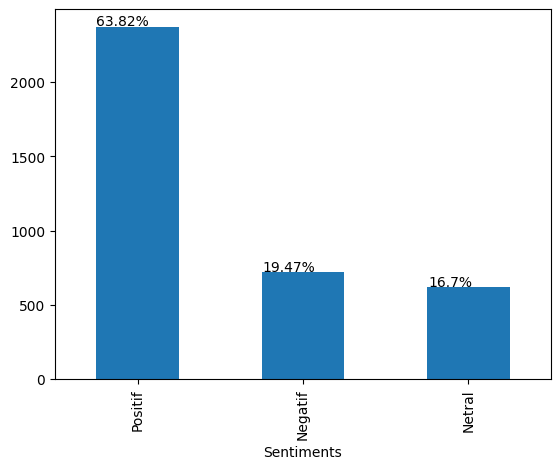

In [11]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)
print(n)

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

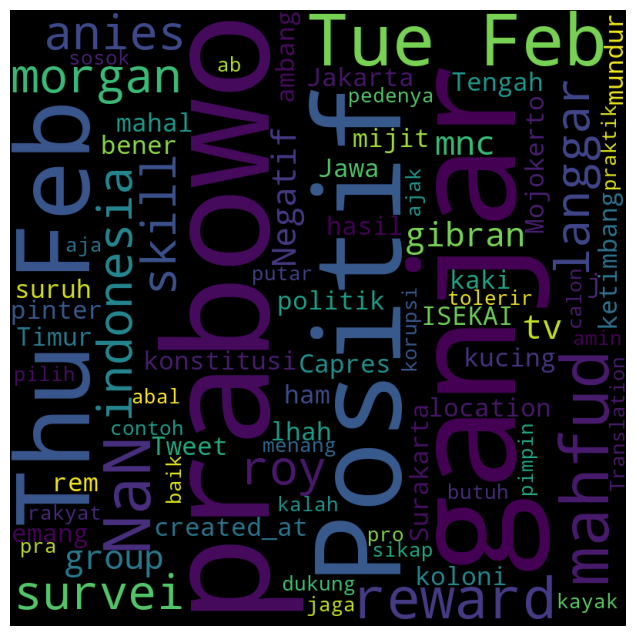

In [12]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                     , min_font_size = 20).generate(str(tweet_df))

# plot the wordcloud

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2')
    wordcloud.generate(all_words)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

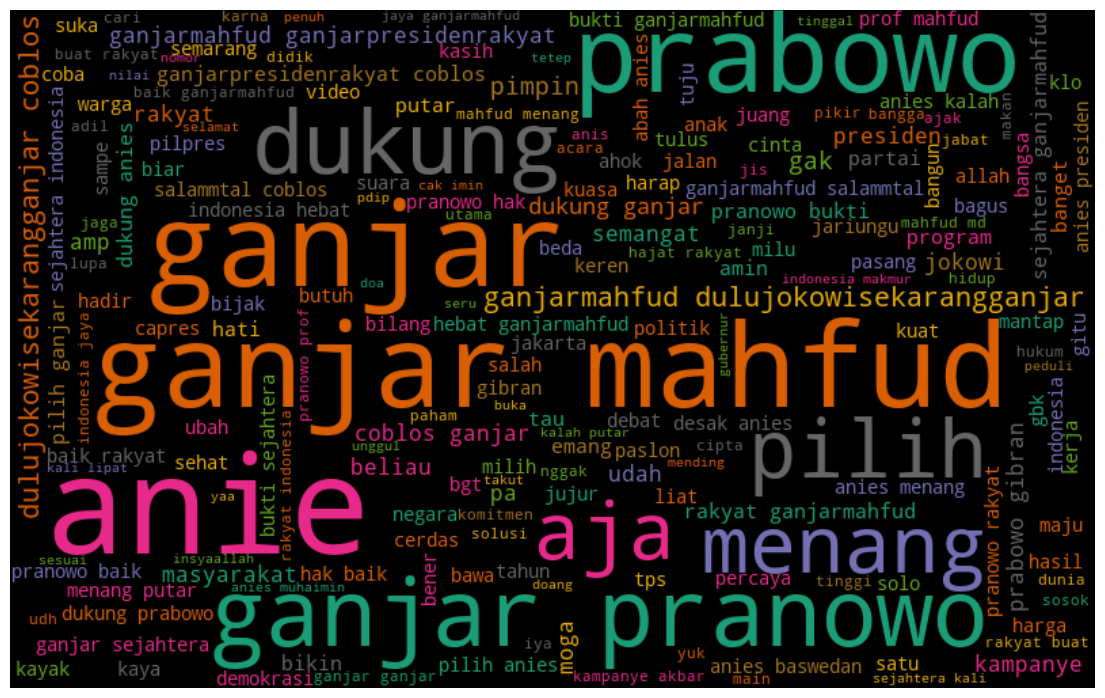

In [14]:
all_words = ' '.join([text for text in tweet_df['Tweet'][tweet_df.Sentiments == 'Positif']])
generate_wordcloud(all_words)

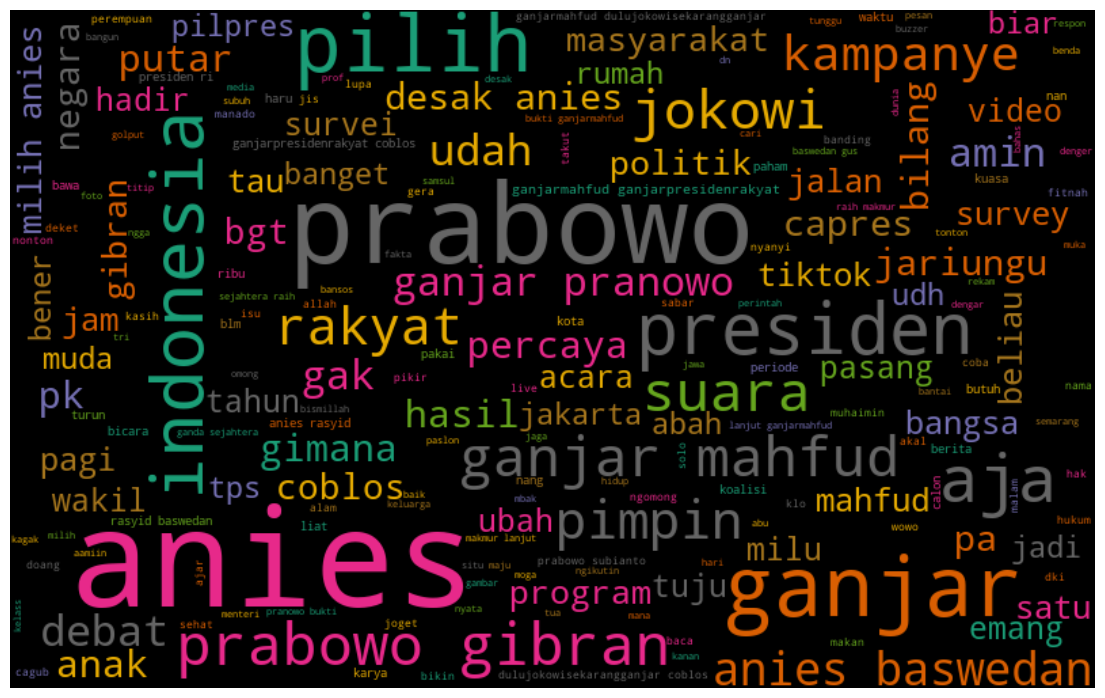

In [16]:
all_words = ' '.join([text for text in tweet_df['Tweet'][tweet_df.Sentiments == 'Netral'].astype(str)])
generate_wordcloud(all_words)

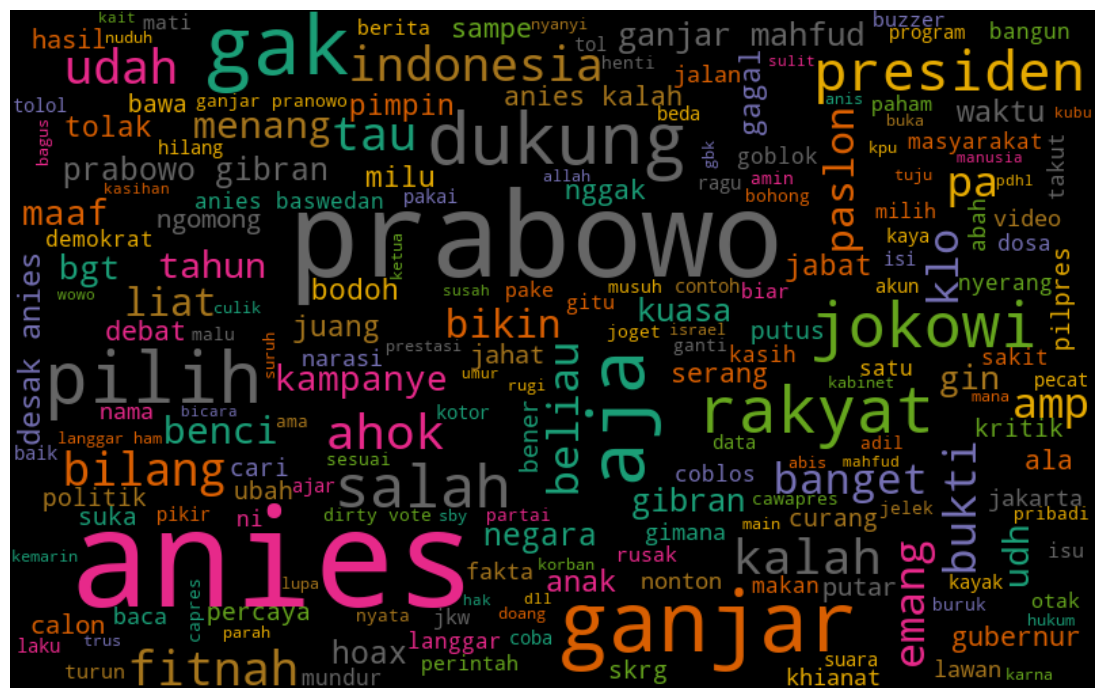

In [17]:
all_words = ' '.join([text for text in tweet_df['Tweet'][tweet_df.Sentiments == 'Negatif']])
generate_wordcloud(all_words)

# Proses Perhitungan Akurasi

In [15]:
!pip install VaderSentiment
!pip install openpyxl

In [45]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

In [46]:
analyser = SentimentIntensityAnalyzer()

In [47]:
pip install openpyxl==3.0.0

In [53]:
# Labeling Manual
dataset = pd.read_csv('Manual.csv',delimiter=';')
dataset.head()

,created_at,location,Tweet,Translation,Sentiments
0,Mon Feb 12 23:59:56 +0000 2024,NaN,anis putar putar sih sel kulit mati kotor tar ...,"Anis is turning around, dirty dead skin cells ...",Negatif
1,Mon Feb 12 23:59:54 +0000 2024,Salatiga,prabowo aja gak ngaji gimana percaya pimpin bener,Prabowo doesn't even know how to believe in le...,Negatif
2,Mon Feb 12 23:59:54 +0000 2024,NaN,ngumpet aja nongol lupa tipikal dukung prabowo...,Just hide and forget to forget the typical sup...,Negatif
3,Mon Feb 12 23:59:49 +0000 2024,NaN,keren euy beda prabowo gibran keren,"So cool, different from Prabowo, Gibran, cool",Netral
4,Mon Feb 12 23:59:49 +0000 2024,NaN,kasi prabowo,kasi prabowo,Positif


In [54]:
scores = [analyser.polarity_scores(x) for x in dataset['Translation']]

In [55]:
dataset['Compound_Score'] = [x['compound'] for x in scores]

In [56]:
dataset.head()

,created_at,location,Tweet,Translation,Sentiments,Compound_Score
0,Mon Feb 12 23:59:56 +0000 2024,NaN,anis putar putar sih sel kulit mati kotor tar ...,"Anis is turning around, dirty dead skin cells ...",Negatif,-0.8020
1,Mon Feb 12 23:59:54 +0000 2024,Salatiga,prabowo aja gak ngaji gimana percaya pimpin bener,Prabowo doesn't even know how to believe in le...,Negatif,0.0000
2,Mon Feb 12 23:59:54 +0000 2024,NaN,ngumpet aja nongol lupa tipikal dukung prabowo...,Just hide and forget to forget the typical sup...,Negatif,0.1779
3,Mon Feb 12 23:59:49 +0000 2024,NaN,keren euy beda prabowo gibran keren,"So cool, different from Prabowo, Gibran, cool",Netral,0.5984
4,Mon Feb 12 23:59:49 +0000 2024,NaN,kasi prabowo,kasi prabowo,Positif,0.0000


In [57]:
# Compound Score 

dataset.loc[dataset['Compound_Score'] < 0, 'Klasifikasi'] = 'Negatif'


dataset.loc[dataset['Compound_Score'] == 0, 'Klasifikasi'] = 'Netral'


dataset.loc[dataset['Compound_Score'] > 0, 'Klasifikasi'] = 'Positif'

dataset.head()

,created_at,location,Tweet,Translation,Sentiments,Compound_Score,Klasifikasi
0,Mon Feb 12 23:59:56 +0000 2024,NaN,anis putar putar sih sel kulit mati kotor tar ...,"Anis is turning around, dirty dead skin cells ...",Negatif,-0.8020,Negatif
1,Mon Feb 12 23:59:54 +0000 2024,Salatiga,prabowo aja gak ngaji gimana percaya pimpin bener,Prabowo doesn't even know how to believe in le...,Negatif,0.0000,Netral
2,Mon Feb 12 23:59:54 +0000 2024,NaN,ngumpet aja nongol lupa tipikal dukung prabowo...,Just hide and forget to forget the typical sup...,Negatif,0.1779,Positif
3,Mon Feb 12 23:59:49 +0000 2024,NaN,keren euy beda prabowo gibran keren,"So cool, different from Prabowo, Gibran, cool",Netral,0.5984,Positif
4,Mon Feb 12 23:59:49 +0000 2024,NaN,kasi prabowo,kasi prabowo,Positif,0.0000,Netral


# Hasil Accuracy, Precision, Recall, dan F1 Score

## CONFUSION MATRIX

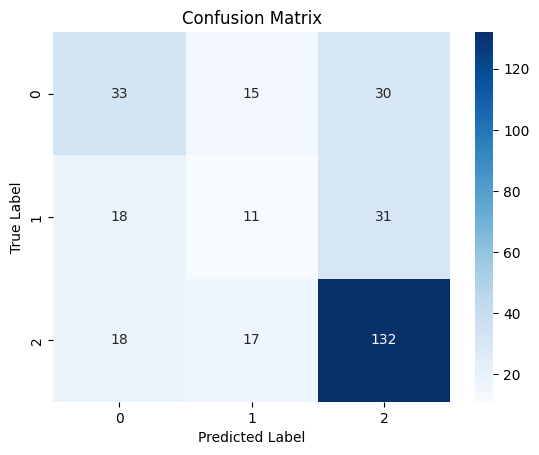

In [58]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(dataset['Sentiments'], dataset['Klasifikasi'])

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn import metrics

In [61]:
print(metrics.classification_report(dataset['Sentiments'], dataset['Klasifikasi']))

              precision    recall  f1-score   support

     Negatif       0.48      0.42      0.45        78
      Netral       0.26      0.18      0.21        60
     Positif       0.68      0.79      0.73       167

    accuracy                           0.58       305
   macro avg       0.47      0.47      0.47       305
weighted avg       0.55      0.58      0.56       305



## $Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \times {100\%} .............................(1)$ 

## $Precission = \frac {TP} {TP + FP}\times {100\%} .....................................(2)$

## $Recall = \frac {TP} {TP + FN}\times {100\%} ........................................(3)$